Selective Search를 이용, Object Detection을 위한 Region Proposal 영역 도출 

# Selective Search 설치 및 Image 로드


In [4]:
!pip install selectivesearch

In [3]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg


--2021-11-10 13:33:57--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0.002s  

2021-11-10 13:33:57 (16.4 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



img shape:  (450, 375, 3)


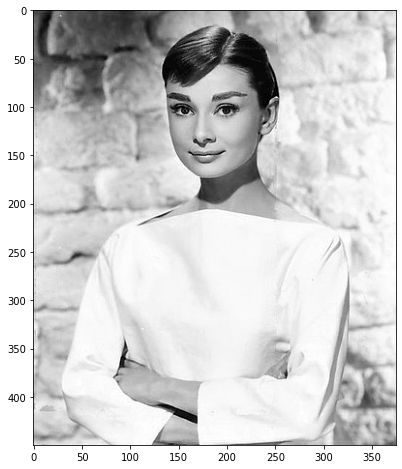

In [6]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os

img = cv2.imread("./data/audrey01.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("img shape: ", img.shape)

plt.figure(figsize = (8,8))
plt.imshow(img_rgb)
plt.show()


selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환

In [14]:

# scale - 수치가 클 수록 큰 object 위주로 알고리즘이 돌게됨
# min_size - 적어도 해당 수치 이상의 크기인 object를 추천 
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 2000)

print(type(regions), len(regions))

<class 'list'> 41


## 반환된 Region Proposal
반환된 regions 변수는 list type, 세부 원소는 dict type
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 해당 값이 Detected Object 후보를 나타내는 Bounding box이다
* size는 Object의 크기
* labels는 해당 rect로 지정된 Bounding Box 내에 object들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding Box 이며 하나의 Bounding Box에 여러개의 object가 있을 확률이 크다


In [10]:
# label이 다수 있는 것은 유사한 label끼리 묶인 것
# rect: (0,0, width, height)
regions

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


In [11]:
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 10000)

print(type(regions), len(regions))


<class 'list'> 6


In [13]:
regions

[{'labels': [0.0], 'rect': (0, 0, 253, 214), 'size': 45311},
 {'labels': [1.0], 'rect': (121, 0, 253, 449), 'size': 41680},
 {'labels': [2.0], 'rect': (0, 171, 368, 278), 'size': 61853},
 {'labels': [3.0], 'rect': (0, 253, 171, 196), 'size': 19906},
 {'labels': [2.0, 3.0], 'rect': (0, 171, 368, 278), 'size': 81759},
 {'labels': [2.0, 3.0, 1.0], 'rect': (0, 0, 374, 449), 'size': 123439}]

In [ ]:

# scale - 수치가 클 수록 큰 object 위주로 알고리즘이 돌게됨
# min_size - 적어도 해당 수치 이상의 크기인 object를 추천 
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 2000)

print(type(regions), len(regions))

In [19]:
cand_rects = [cand["rect"] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


# Bounding Box 시각화

rectangle(): Bounding Box의 표시 
이미지와 좌상단 좌표, 우하단 좌표, box 컬러색, 두께 등을 인자로 입력
원본 이미지에 box을 그려줌

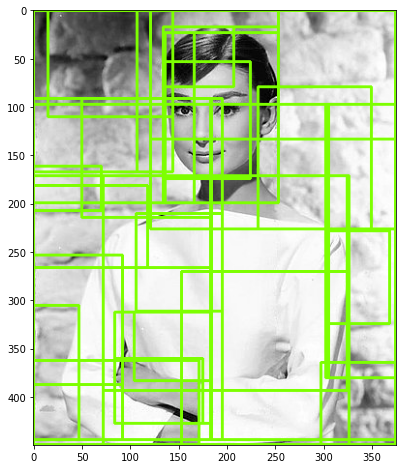

In [28]:


green_rgb = (125, 255, 0)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:

  left = rect[0]
  top = rect[1]

  right = left + rect[2]
  bottom = top + rect[3]


  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (8,8))
plt.imshow(img_rgb_copy)
plt.show()